In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from EDMtoolkit import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
# My Functions

# Slow Feature Analysis Functions
def nonlinearBasisExpand(x):
    n = x.shape[0]
    d = x.shape[1]
    
    M = int(d+d*(d+1)/2) # number of monomials and binomials
    
    hx = np.zeros((n,M))
    hx[:,0:d] = x
    ind = d
    for i in range(d):
        xi = x[:,i]
        for j in range(i,d):
            xj = x[:,j]
            hx[:,ind] = np.multiply(xi, xj)
            ind += 1
            
    return hx

def standardize(x):
    return (x - np.mean(x[np.isfinite(x)],axis=0)) / np.std(x[np.isfinite(x)],axis=0)

def linearSimilarity(d, c): # d = column vectors of drivers, c = column vector of "color" of lyapunov spectrum
    if c.ndim == 1:
        c = c.reshape((len(c),1))
    if d.ndim == 1:
        d = d.reshape((len(d),1))
        
    finiteVals = np.logical_and(np.all(np.isfinite(d),axis=1),np.all(np.isfinite(c),axis=1))
    dNoNAs = d[finiteVals]
    cNoNAs = c[finiteVals]
    
    dinv = la.inv(dNoNAs.T @ dNoNAs) @ dNoNAs.T
    k = dinv @ cNoNAs
    
    return (k, timeSeriesSimilarity((dNoNAs @ k).flatten(), cNoNAs.flatten()))

def timeSeriesSimilarity(t1, t2):
    return abs(np.dot(t1,t2) / (la.norm(t1) * la.norm(t2)))

In [3]:
file = "../Datasets/alldata.csv"
data = pd.read_csv(file,encoding="utf-8",na_filter=False)
data = data.astype({"Abundance" : float})
print(data.info())

# print(data.isna().sum())

pd.option_context("display.max_rows","display.max_columns")

data.drop(["Level"],1,inplace=True)
# data.set_index(["Site","Month","Year"],inplace=True)
# display(data.query("Site == ['Lake Apopka (FL)'] and "))

for site in data["Site"].drop_duplicates():
    for species in data.query("Site == ['{s}']".format(s=site))["Name"].drop_duplicates():
        s = data.query("Site == ['{s}'] and Name == ['{n}']".format(s=site,n=species))
        print("len = {le}, NAs = {nas} : {l} population of {s} ".format(s=species,l=site, le=len(s), nas=s["Abundance"].isna().sum()) )

# Lake Geneva has alot of data points, some NAs, is not restricted use, but has crap temperature data
# Esthwaite Water Zooplankton has almost 0 NAs, good temp data, is of reasonable size, and is not restricted use - BINGO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175085 entries, 0 to 175084
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Site       175085 non-null  object 
 1   Year       175085 non-null  int64  
 2   Month      175085 non-null  int64  
 3   Name       175085 non-null  object 
 4   Abundance  142755 non-null  float64
 5   Level      175085 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.0+ MB
None
len = 324, NAs = 24 : Blelham Tarn (UK) population of Chla 
len = 324, NAs = 14 : Blelham Tarn (UK) population of Zooplankton 
len = 395, NAs = 12 : Esthwaite Water (UK) population of Chla 
len = 395, NAs = 2 : Esthwaite Water (UK) population of Zooplankton 
len = 395, NAs = 25 : Windermere North (UK) population of copepod 
len = 395, NAs = 25 : Windermere North (UK) population of large.clad 
len = 395, NAs = 25 : Windermere North (UK) population of small.clad 
len = 395, NAs = 11 : Winderm

c:\users\kenneth gee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


len = 212, NAs = 20 : Lake Apopka (FL) population of copepod 
len = 212, NAs = 6 : Lake Apopka (FL) population of Chla 
len = 212, NAs = 20 : Lake Apopka (FL) population of Zooplankton 
len = 211, NAs = 22 : Lake Beauclair (FL) population of clad 
len = 211, NAs = 27 : Lake Beauclair (FL) population of copepod 
len = 211, NAs = 9 : Lake Beauclair (FL) population of Chla 
len = 211, NAs = 27 : Lake Beauclair (FL) population of Zooplankton 
len = 212, NAs = 28 : Lake Dora (FL) population of clad 
len = 212, NAs = 33 : Lake Dora (FL) population of copepod 
len = 212, NAs = 20 : Lake Dora (FL) population of Chla 
len = 212, NAs = 33 : Lake Dora (FL) population of Zooplankton 
len = 208, NAs = 21 : Lake Eustis (FL) population of clad 
len = 208, NAs = 26 : Lake Eustis (FL) population of copepod 
len = 208, NAs = 43 : Lake Eustis (FL) population of Chla 
len = 208, NAs = 26 : Lake Eustis (FL) population of Zooplankton 
len = 210, NAs = 18 : Lake Griffin (FL) population of clad 
len = 210, NA

len = 477, NAs = 15 : Lake Muggelsee population of Rotifers spp. 
len = 477, NAs = 15 : Lake Muggelsee population of Synchaeta oblonga 
len = 477, NAs = 15 : Lake Muggelsee population of Synchaeta pectinata 
len = 477, NAs = 15 : Lake Muggelsee population of Synchaeta spp.  
len = 477, NAs = 15 : Lake Muggelsee population of Trichocerca similis 
len = 305, NAs = 128 : Narragansett Bay population of Zooplankton 
len = 305, NAs = 18 : Narragansett Bay population of Chla 
len = 305, NAs = 137 : Narragansett Bay population of Acartia.hudsonica 
len = 305, NAs = 137 : Narragansett Bay population of Acartia.tonsa 
len = 672, NAs = 0 : North Sea population of Zooplankton 
len = 672, NAs = 0 : North Sea population of Chla 
len = 672, NAs = 0 : North Sea population of carnivore 
len = 672, NAs = 0 : North Sea population of herbivore 
len = 672, NAs = 0 : North Sea population of Paralia.sulcata. 
len = 672, NAs = 0 : North Sea population of Skeletonema.costatum. 
len = 672, NAs = 0 : North Sea p

len = 248, NAs = 136 : Strait of Georgia population of Total.Copepods 
len = 248, NAs = 138 : Strait of Georgia population of Calanoids.less1mm 
len = 248, NAs = 136 : Strait of Georgia population of Calanoids.1to3mm 
len = 248, NAs = 150 : Strait of Georgia population of Calanoids.3to5mm 
len = 248, NAs = 150 : Strait of Georgia population of Calanoids.greater5mm 
len = 248, NAs = 138 : Strait of Georgia population of Total.Euphausiids.less1.cm 
len = 248, NAs = 138 : Strait of Georgia population of E.pacifica.less1cm 
len = 248, NAs = 138 : Strait of Georgia population of Thysanoessa.less1cm 
len = 248, NAs = 136 : Strait of Georgia population of Gammarids 
len = 248, NAs = 136 : Strait of Georgia population of Hyperiids 
len = 248, NAs = 136 : Strait of Georgia population of Ostracods 
len = 248, NAs = 169 : Strait of Georgia population of Shrimps 
len = 248, NAs = 169 : Strait of Georgia population of Crab.larvae 
len = 248, NAs = 136 : Strait of Georgia population of Chaetognaths 

len = 440, NAs = 160 : Trout Lake (WI) population of DAPHNIA LONGIREMIS 
len = 440, NAs = 160 : Trout Lake (WI) population of ASPLANCHNA 
len = 440, NAs = 160 : Trout Lake (WI) population of CONOCHILUS 
len = 440, NAs = 160 : Trout Lake (WI) population of FILINIA TERMINALIS 
len = 440, NAs = 160 : Trout Lake (WI) population of GASTROPUS STYLIFER 
len = 440, NAs = 160 : Trout Lake (WI) population of KELLICOTTIA LONGISPINA 
len = 440, NAs = 160 : Trout Lake (WI) population of KERATELLA COCHLEARIS 
len = 440, NAs = 160 : Trout Lake (WI) population of KERATELLA CRASSA 
len = 440, NAs = 160 : Trout Lake (WI) population of KERATELLA EARLINAE 
len = 440, NAs = 160 : Trout Lake (WI) population of KERATELLA HIEMALIS 
len = 440, NAs = 160 : Trout Lake (WI) population of KERATELLA QUADRATA 
len = 440, NAs = 160 : Trout Lake (WI) population of NOTHOLCA FOLIACEA 
len = 440, NAs = 160 : Trout Lake (WI) population of POLYARTHRA DOLICHOPTERA 
len = 440, NAs = 160 : Trout Lake (WI) population of POLYAR

0
0
0


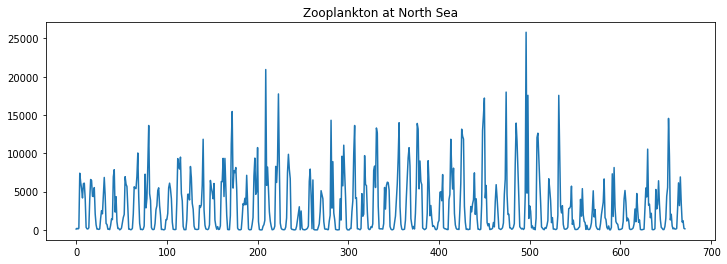

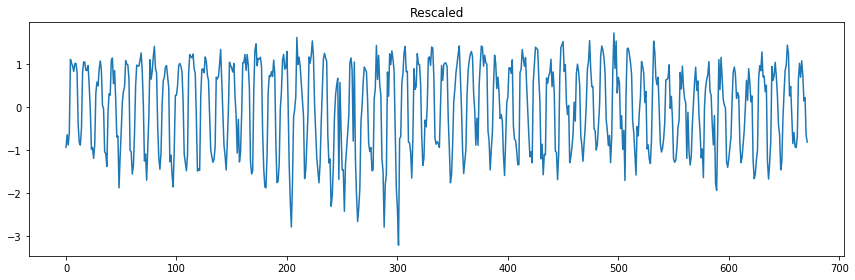

In [4]:
np.set_printoptions(precision=4, suppress=True)

location = "North Sea"
species = "Zooplankton"
EWdata = data.query("Site == ['{loc}'] and Name == ['{n}']".format(loc=location, n=species))["Abundance"].to_numpy()

"""
for species in EWdata["Name"].drop_duplicates():
    axWater[i].set_title("{s} at {l}".format(s=species,l=location))
    axWater[i].plot(EWdata.query("Name == ['{n}']".format(n=species))["Abundance"].to_numpy());
    i += 1
"""

print(np.sum(np.isnan(EWdata)))
Xr = EWdata - np.nanmin(EWdata) + 1
# Xr = EWdata + np.std( EWdata, axis = 0, where=np.isfinite(EWdata))
print(np.sum(np.isnan(EWdata)))

# Xr = standardize(np.sqrt(Xr, where = np.isfinite(Xr)))
Xr = np.log2(Xr + 0.1, where = np.isfinite(Xr+0.1), out=Xr) + 1
# Xr = Xr ** (1/10)
print(np.sum(np.isnan(Xr)))
# Xr = standardize(np.log(Xr, where = np.logical_and(np.isfinite(Xr), np.not_equal(Xr, Xr*0))))
# Now try without log transform
Xr = standardize(Xr) # RESULT - WORKS MUCH MORE CLEANLY WITH LOG TRANSFORM
# Xr = Xr[:175]
Xr = Xr.reshape(len(Xr),1)

t = np.linspace(0,1,num=len(Xr))

ngraphs = 1
figWater, axWater = plt.subplots(ngraphs, figsize=(12,4*ngraphs))
# for location in data.index.levels[0][:3]:
axWater.set_title("{s} at {l}".format(s=species,l=location))
# axWater.plot(EWdata.query("Name == ['{n}']".format(n=species))["Abundance"].to_numpy());
axWater.plot(EWdata);

figPlank, axPlank = plt.subplots(figsize=(12,4))
axPlank.plot(Xr)
axPlank.set_title("Rescaled")
 
plt.tight_layout()
plt.show()

In [5]:
print(Xr.shape)
print(np.unique(Xr).shape)

(672, 1)
(672,)


In [ ]:
poincare3d(Xr, scatter=False)
poincare2d(Xr)
poincareT(Xr)

C:\Users\Kenneth Gee\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Kenneth Gee\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Kenneth Gee\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\Kenneth Gee\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\Kenneth Gee\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NAs at Blelham Tarn (UK) = 5
NAs at Esthwaite Water (UK) = 1
NAs at Windermere North (UK) = 0
NAs at Lake Apopka (FL) = 6
NAs at Lake Beauclair (FL) = 10
NAs at Lake Dora (FL) = 18
NAs at Lake Eustis (FL) = 43
NAs at Lake Griffin (FL) = 11
NAs at Lake Harris (FL) = 28
NAs at Lake Yale (FL) = 57
NAs at Lake Greifensee = 43
NAs at Lake Geneva = 79
NAs at Lake Kasumigaura = 12
NAs at Lake Mendota (WI) = 121
NAs at Loch Leven = 212
NAs at Lake Zurich = 53
NAs at Lake Muggelsee = 47
NAs at Narragansett Bay = 2
NAs at Lake Taupo = 15
NAs at Oneida Lake = 282
NAs at Big Muskellunge (WI) = 159
NAs at Crystal Bog (WI) = 172
NAs at Crystal Lake (WI) = 113
NAs at Sparkling Lake (WI) = 150
NAs at Trout Lake (WI) = 164


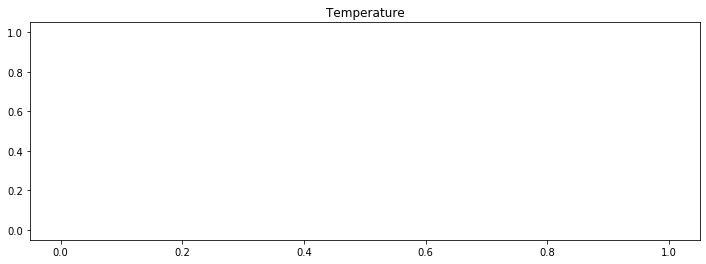

In [7]:
# Read out driver

file = "../Datasets/temperaturedata.csv"
driverData = pd.read_csv(file, encoding="utf-8", na_filter = True)
driverR = driverData.query("Site == ['{loc}']".format(loc=location))["Temp"].to_numpy()
driverR = driverR.reshape(len(driverR),1)
driverR = standardize(driverR)

driverR = driverR[:Xr.shape[0]]

for location in driverData["Site"].drop_duplicates():
    nNAs = np.sum(np.isnan(driverData.query("Site == ['{loc}']".format(loc=location))["Temp"]))
    print("NAs at {loc} = {nna}".format(loc = location, nna = nNAs))

figDr, axDr = plt.subplots(figsize = (12,4))
axDr.plot(driverR, color="tab:orange")
axDr.set_title("Temperature")
plt.show()

In [8]:
# Correlation between driver and original unaltered data
k, sim = linearSimilarity(driverR, Xr)
figCorr, axCorr = plt.subplots(1,figsize=(12,4))

axCorr.plot(Xr)
axCorr.plot(driverR @ k)
axCorr.set_title("Correlation = {c}, coef = {K}".format(c=sim, K=k))

print("Null Correlation = ", sim)

plt.show()

ValueError: operands could not be broadcast together with shapes (0,) (672,) 

In [ ]:
"""
tlen = 440
r = lambda t : 3.35 + 0.6 * np.sin(0.7*2*np.pi*t/tlen)
# r = lambda t : 0.5 * t / tlen + 3.5
states = np.zeros((tlen,1))
states[0,0] = 0.33333333
for t in range(1,tlen):
    states[t,0] = r(t) * states[t-1,0] * (1 - states[t-1,0])
Xr = states

figLog, axLog = plt.subplots(figsize=(12,4))
axLog.plot(Xr)
plt.show()
"""

In [ ]:
# False Nearest Neighbors Test

# Unitary Embedding Testing

FNNplot(Xr,10, 3)

"""
dim = 1

l = 10
c = 1
st = 3

# figFNN, axFNN = plt.subplots(2 * c,figsize=(16, 3*(2*c)))
figFNN, axFNN = plt.subplots(c, figsize=(16, 6*c))
# figFNN = plt.figure(figsize=(12, 8))
# axFNN = figFNN.add_subplot()

for c in range(1, c+1):
    lyapExps = np.zeros(l)
    for s in range(1, st+1, 1):
        for i in range(1, l+1):
            Y, _ = delayEmbed(Xr[::c], Xr[::c], [i]*dim,s)
            # Y, _ = delayEmbedUnitary(Xr[::c], Xr[::c], i,s)
            lyapExps[i-1] = lyapunovExp(Y)
            
        axFNN.plot(range(1,l+1), lyapExps, label="{e}".format(e=s))

    axFNN.legend()
    axFNN.set_xlabel("Embedding Dimension")
    # axFNN[c-1].set_title("Slice = {ind}".format(ind=c))
    axFNN.set_ylabel("Lyapunov Exponent")
    
plt.show()
"""

In [12]:
step = 1
maxLags = 4
horizon = 1

resolution = 15
thetas = np.linspace(1, 100, resolution)
deltas = np.linspace(0, 1, resolution)


In [ ]:
thetaNS, deltaNS, lagNS, landNS = NSMapOptimize(Xr, t, horizon, maxLags, step, thetas, deltas)
thetaS, deltaS, lagS, landS = SMapOptimize(Xr, t, horizon, maxLags, step, thetas)

In [ ]:
""" COMPUTE DOFS """

Xn, Yn, txn = delayEmbed(Xr, horizon, lagNS, step, t=t)
dofNS = dofestimation(Xn, Yn, txn, thetaNS, deltaNS)

Xs, Ys, txs = delayEmbed(Xr, horizon, lagBestS, lagStep, t=t)
dofS = dofestimation(Xs, Ys, txs, thetaS, 0)

In [ ]:
predictedTSNS = leaveOneOut(Xn, Yn, txn, thetaBestNS, deltaBestNS)
predictedTSS = leaveOneOut(Xs, Ys, txs, thetaBestS, 0)

In [ ]:
# X, _ = delayEmbed(Xr, Xr, [embDim]*dim,stepSize)
# driver = driverR[embDim:]
# print("X shape:", X.shape,"\nDriver shape: ",driver.shape)

In [ ]:
MSENS = np.mean((predictedTSNS - Yn) ** 2 )
MSES = np.mean((predictedTSS - Ys) ** 2 )

<IPython.core.display.Javascript object>


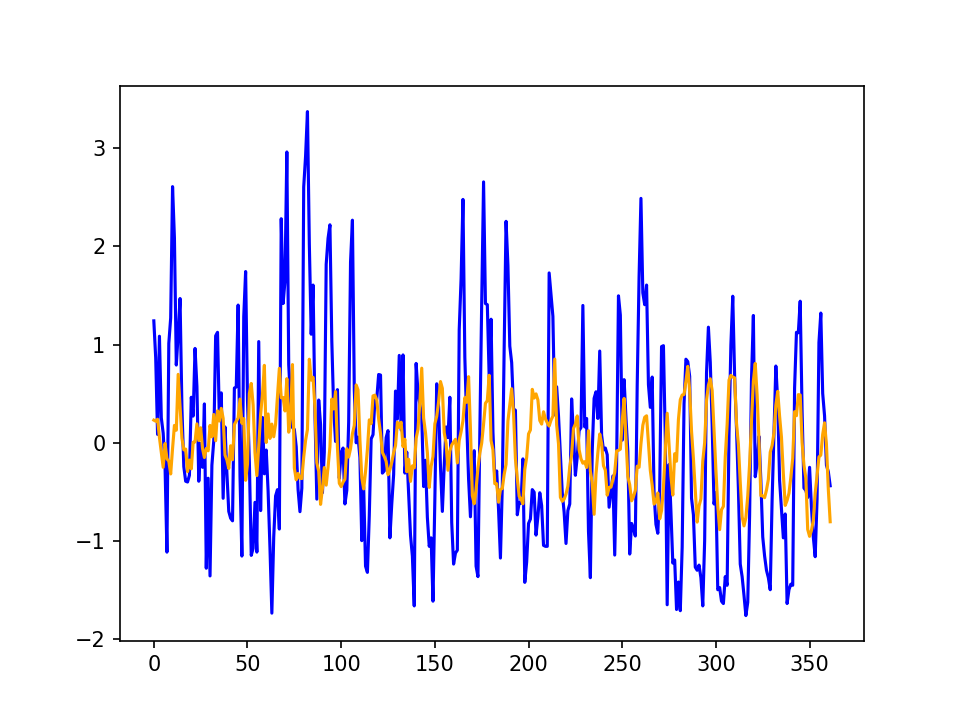

In [217]:
figLOU, axLOU = plt.subplots(2, figsize=(8,8))
axLOU[0].plot(Yn, c="blue", linestyle="dashed", label="True Time Series")
axLOU[0].plot(predictedTSNS, c="green", linestyle="dotted", label="NSMap Predictions")
axLOU[0].legend()

axLOU[1].plot(Ys, c="blue", linestyle="dashed", label="True Time Series")
axLOU[1].plot(predictedTSS, c="silver", linestyle="dotted", label="SMap Predictions")
axLOU[1].legend()
plt.show()

In [218]:
chi, dof = likelihoodRatioTest(X,Y, tx, 2.93, theta,delta, errmap)
print("Probability SMap is better: ",chisig(chi, dof))
print(f"Degrees of Freedom difference: {dof}, test stat: {chi}")

Probability SMap is better:  0.9999999999015914
Degrees of Freedom difference: 91.57856897724963, test stat: 29.733274525532046


<IPython.core.display.Javascript object>


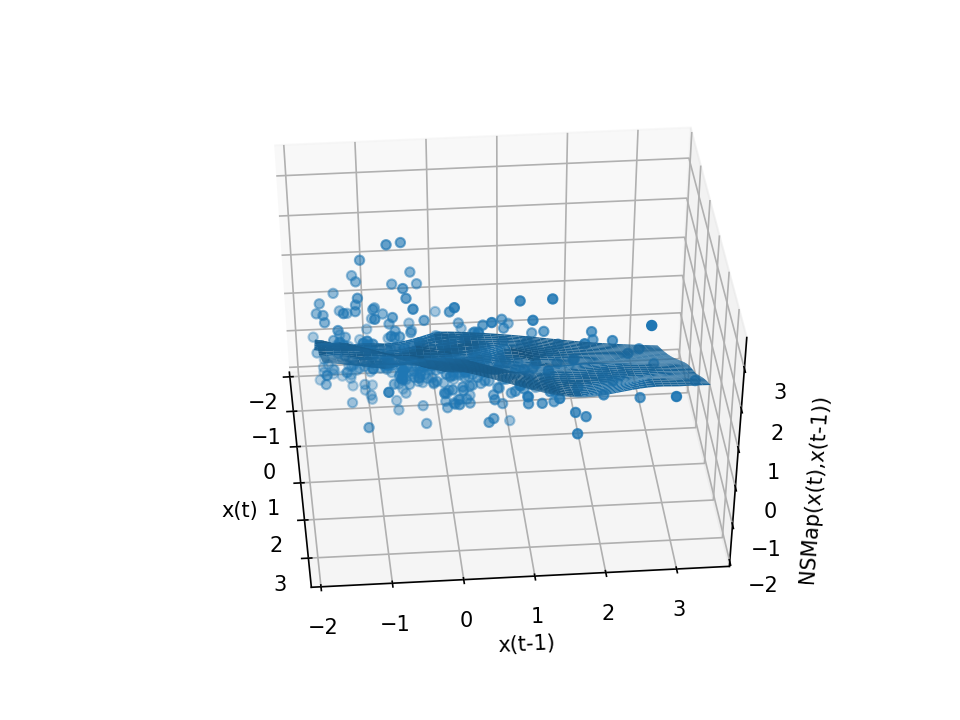

<IPython.core.display.Javascript object>


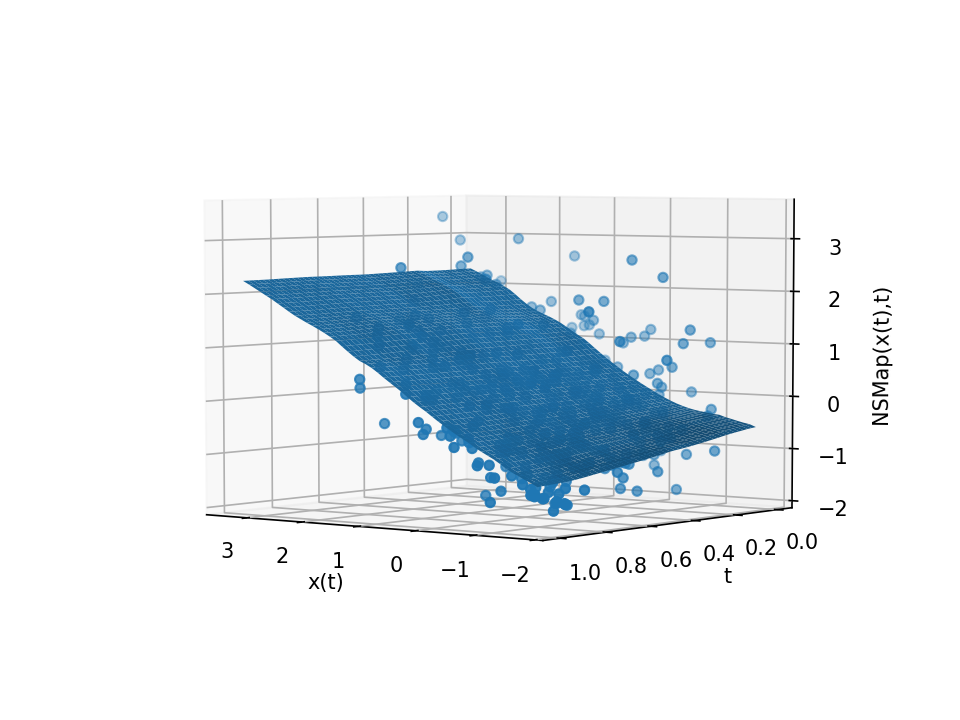

In [213]:
functionSurfaceSMap(Xr, 1, 2.31, 50)
functionSurfaceNSMap(Xr, 1, theta, delta, 50)

In [93]:
# do SFA
"""
Xstd = standardize(X)
basisExpanded = nonlinearBasisExpand(Xstd)

# whitening - this is independent of the order of the values, so we can safely drop any NAs
NAsRemoved = basisExpanded[~np.any(np.isnan(basisExpanded),axis=1)]

U, S, V = la.svd(NAsRemoved)
whitened = U[:,:V.shape[0]] @ V

whitenedVal, whitenedVec = la.eigh(np.cov(NAsRemoved.T,bias=False))
whitened = NAsRemoved @ (whitenedVec @ np.diag((whitenedVal+1e-7) ** -0.5))


print("Mean Test : ", np.mean(whitened))
print("Covariance Test : \n",np.cov(whitened.T))

derivatives = whitened[1:,:] - whitened[:-1,:]
colors, spectrum = la.eigh(np.cov(derivatives, rowvar=False))

print("Colors = ",colors)
"""

'\nXstd = standardize(X)\nbasisExpanded = nonlinearBasisExpand(Xstd)\n\n# whitening - this is independent of the order of the values, so we can safely drop any NAs\nNAsRemoved = basisExpanded[~np.any(np.isnan(basisExpanded),axis=1)]\n\nU, S, V = la.svd(NAsRemoved)\nwhitened = U[:,:V.shape[0]] @ V\n\nwhitenedVal, whitenedVec = la.eigh(np.cov(NAsRemoved.T,bias=False))\nwhitened = NAsRemoved @ (whitenedVec @ np.diag((whitenedVal+1e-7) ** -0.5))\n\n\nprint("Mean Test : ", np.mean(whitened))\nprint("Covariance Test : \n",np.cov(whitened.T))\n\nderivatives = whitened[1:,:] - whitened[:-1,:]\ncolors, spectrum = la.eigh(np.cov(derivatives, rowvar=False))\n\nprint("Colors = ",colors)\n'

In [13]:
basisExpanded = nonlinearBasisExpand(X)
# basisExpandedSt = standardize(basisExpanded)
basisExpandedSt = basisExpanded - np.mean(basisExpanded[np.isfinite(basisExpanded)],axis=0)
print("NA Rows = ",np.sum(np.any(np.isnan(basisExpandedSt),axis=1)), basisExpandedSt.shape)

basisExpandedStNoNas = basisExpanded[np.all(np.isfinite(basisExpanded),axis=1)]

# Whitening!

# SVD Version - seems to be more numerically unstable than PCA, which is strange. Will use PCA for now but I should revist this
"""
U, S, V = la.svd(basisExpandedStNoNas)
whitened = basisExpandedSt @ V.T @ np.diag(1/S)

whitenedNoNas = whitened[np.all(np.isfinite(whitened),axis = 1)]

print("NA rows = ", np.sum(np.any(np.isnan(whitened),axis=1)), whitened.shape)
"""
# PCA Version
covPCA = np.cov(basisExpandedStNoNas.T) # cov is non nan
eigValPCA, eigVecPCA = la.eigh(covPCA)
print("PCA eigenvals(many 0 values suggest high redundancy in data) : \n",eigValPCA)

whitened = basisExpandedSt @ (eigVecPCA @ np.diag((eigValPCA+1e-7) ** -0.5))
whitenedNoNas = whitened[np.all(np.isfinite(whitened),axis = 1)]

"""
c = np.cov(zprime.T, bias=False, rowvar=True)
print("NAs = ", np.sum(np.isnan(c)))
# print("Covariance = ", c, c.shape)

eigval, eigvec = la.eigh(c)
# print("Eigenstuff = ", eigval, eigvec)
print("Eigenvals(shouldn't be near 0) ", eigval)

diagEigVal = np.diag((eigval+1e-7) ** -0.5)

print(zprime.shape, diagEigVal.shape, eigvec.T.shape)
z = zprime @ (eigvec @ diagEigVal)
"""
# print("z = ", z)
print("Mean test(should be 0)", np.mean(whitenedNoNas))
print("Covariance test(should be I): \n", np.cov(whitenedNoNas.T))
# print("Covariance test(should be I): \n", np.cov(whitened.T))

# Another PCA on derivatives
dWhiteneddt = whitened[1:,:] - whitened[:-1,:]
covdWhiteneddt = np.cov(dWhiteneddt[np.all(np.isfinite(dWhiteneddt),axis=1)].T)
colors, spectrum = la.eigh(covdWhiteneddt)

a = spectrum[:,np.argsort(colors)[0]] # eigVecDot.sort(key=eigValDot)[0]
# print(a)
yt = whitened @ a
print(a.shape, whitened.shape)


NA Rows =  40 (473, 20)
PCA eigenvals(many 0 values suggest high redundancy in data) : 
 [ 0.0836  0.093   0.1378  0.1412  0.2262  0.2457  0.2582  0.3548  0.3644
  0.4436  0.6461  0.8241  0.9743  1.3691  1.9141  2.4277  2.7668  3.4758
  7.1548 16.952 ]
Mean test(should be 0) -0.08597165833419998
Covariance test(should be I): 
 [[ 1.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0.  0.
  -0. -0.]
 [ 0.  1. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.
  -0.  0.]
 [-0. -0.  1.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0.
  -0. -0.]
 [ 0. -0.  0.  1.  0. -0.  0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
  -0. -0.]
 [-0.  0.  0.  0.  1.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0.
   0.  0.]
 [ 0.  0.  0. -0.  0.  1. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.
  -0. -0.]
 [ 0. -0.  0.  0.  0. -0.  1. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0. -0.
  -0.  0.]
 [-0. -0.  0. -0. -0.  0. -0.  1. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.
  

<IPython.core.display.Javascript object>


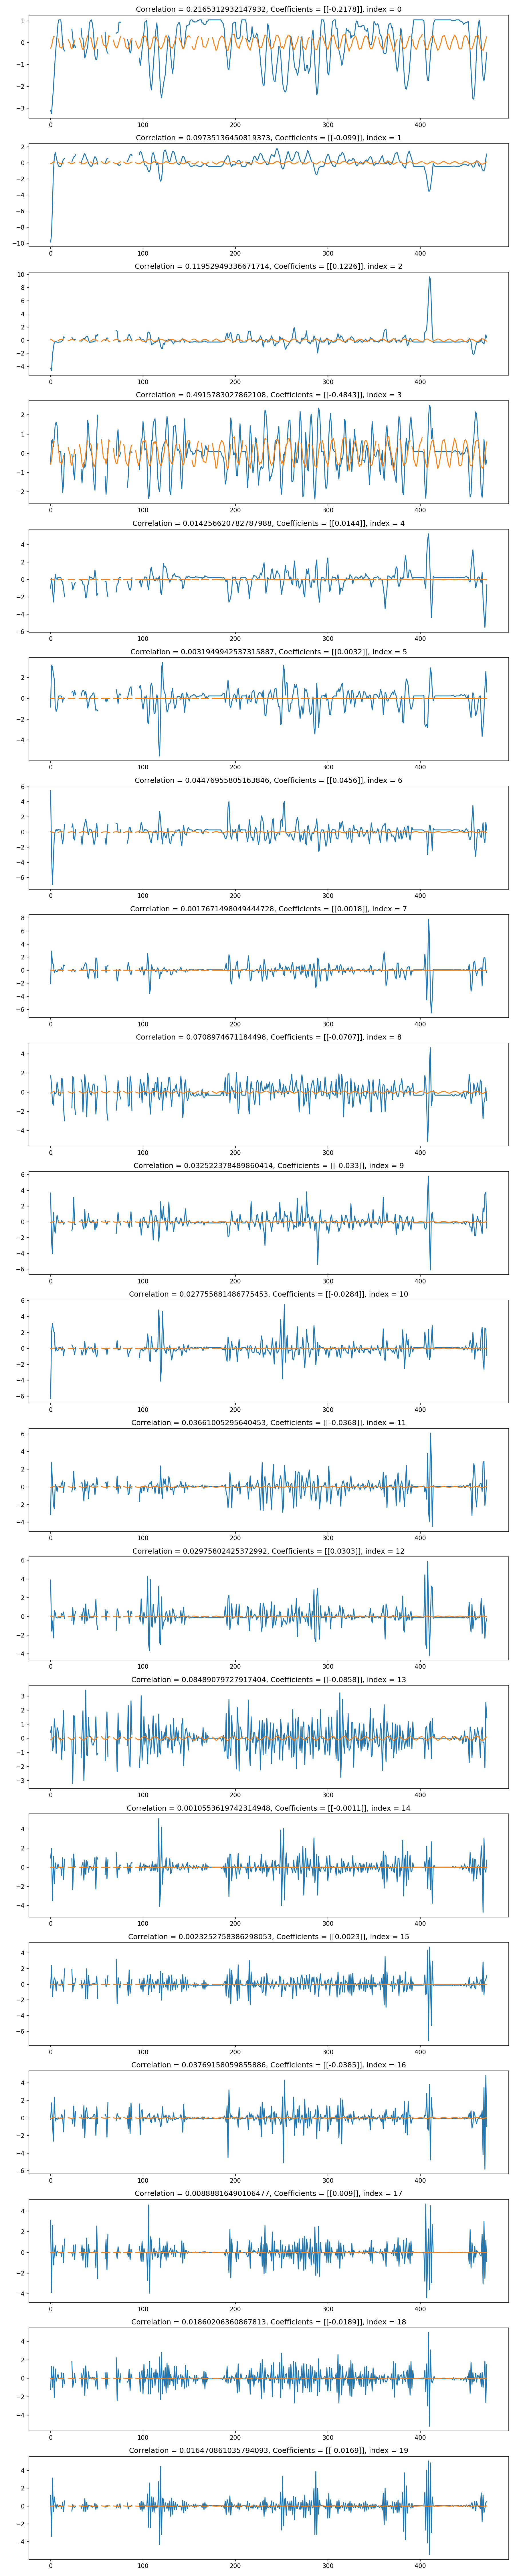

In [14]:
figSpectrum, axSpectrum = plt.subplots(len(colors), figsize=(12,3*len(colors)))

for i in range(len(colors)):
    projection = spectrum[:,i] @ whitened.T
    projectionSt = standardize(projection)
    
    k, sim = linearSimilarity(driver, projectionSt)
    
    axSpectrum[i].plot( projectionSt )
    axSpectrum[i].plot( driver @ k ,c="tab:orange")
    axSpectrum[i].set_title("Correlation = {c}, Coefficients = {K}, index = {I}".format(c=sim,K=k,I=i))
    
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


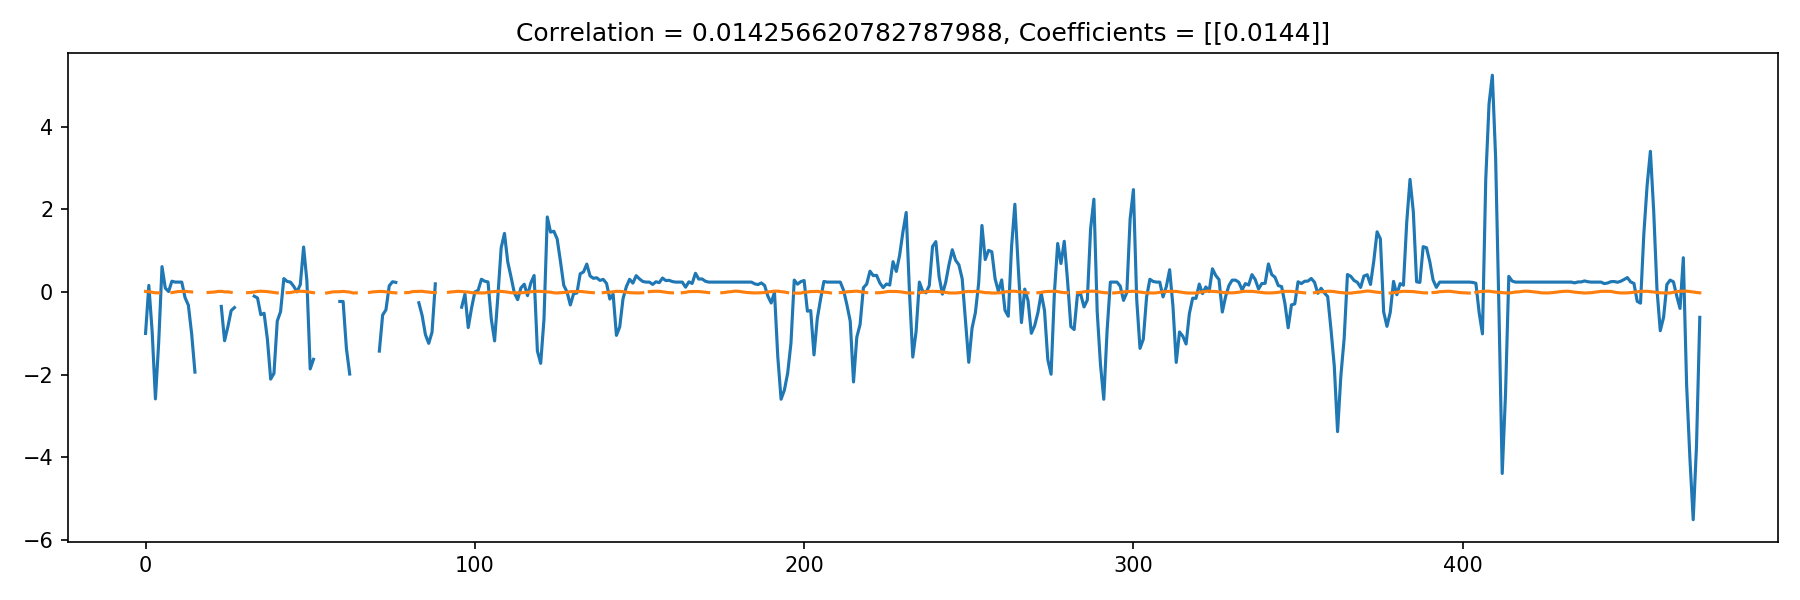

In [15]:
singleGraphIndex = 4

figSpectrum, axSpectrum = plt.subplots(1, figsize=(12,4))

projection = spectrum[:,singleGraphIndex] @ whitened.T
projectionSt = standardize(projection)

k, sim = linearSimilarity(driver, projectionSt)

axSpectrum.plot( projectionSt )
axSpectrum.plot( driver @ k ,c="tab:orange")
axSpectrum.set_title("Correlation = {c}, Coefficients = {K}".format(c=sim,K=k))
    
plt.tight_layout()
plt.show()

#### 